In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

A base de dados Cars contém a velocidade que um carro estava e a distância que ele percorreu após frear e parar totalmente.

In [4]:
dataset = pd.read_csv("data/cars.csv")
dataset.shape

(50, 3)

Com isso observa-se que o dataset tem 50 entradas e 3 atributos.

In [5]:
dataset.head()

,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


Com esses dados é possível fazer a previsão da velocidade que um carro estava se ele percorreu uma certa distância, para isso será usada regressão linear.

Inicialmente observa-se que existe uma coluna com os índices, indicando o índice de uma entrada, como o dataframe do pandas já possui esse índice, é possível remover essa coluna.

Para isso utiliza-se o método `drop` que passa a coluna ou linha como atributo e o eixo que será removido, se é o vertical ou horizontal.

In [6]:
dataset = dataset.drop(["Unnamed: 0"], axis=1)
dataset.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


Para começar, os atributos do dataset são separados, separa-se em x e y, que são as variáveis independente e dependente respectivamente. A variável independente é aquela que vai se usar para calcular, no caso será a distância percorrida após a frenagem e a variável dependente é a velocidade que o carro estava, pois o cálculo dela, dependerá da outra variável.

In [12]:
x = dataset.iloc[:, 1].values
y = dataset.iloc[:, 0].values
print(x)

[  2  10   4  22  16  10  18  26  34  17  28  14  20  24  28  26  34  34
  46  26  36  60  80  20  26  54  32  40  32  40  50  42  56  76  84  36
  46  68  32  48  52  56  64  66  54  70  92  93 120  85]


Agora, calcula-se a correlação, que é um valor que varia de -1 a 1, quanto mais próximo de 1 ou -1, mais forte é a correlação, quanto mais próxima de 0, mais fraca é a correlação.

In [8]:
np.corrcoef(x, y)

array([[1.       , 0.8068949],
       [0.8068949, 1.       ]])

Observa-se que a correlação entre as variáveis é de 0.8068949, o que indica uma correlação positiva forte, ou seja, se x aumenta, y aumenta. Por ser forte, pode ser utilizada a regressão linear para obter bons resultados.

Quando a variável x foi criada, observa-se que ela é um array de 1 dimensão. Para que a regressão linear aconteça, é necessário que a variável independente, o x, seja um array de 2 dimensões. Para isso utiliza-se o método `reshape`. O primeiro argumento indica que é para o numpy determinar o número de linhas e o segundo argumento indica que é necessário que tenha apenas 1 coluna.

Agora a regressão linear pode ser realizada. Utilizando a classe `LinearRegression` da biblioteca `sklearn`. Um objeto do tipo LinearRegression é instanciado na variável modelo. Utilizando o método `fit` passando como parâmetro as variáveis independente e dependente, o modelo de regressão linear é criado.

In [15]:
# Mudando o formato da variável x
x = x.reshape(-1, 1)

# Criando o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(x, y)

LinearRegression()

É possível ver a partir do modelo onde a reta de regressão linear intercepta com o eixo y e qual o coeficiente angular da reta.

In [20]:
print(f"Coeficiente Angular: {modelo.coef_}\nInterseção com eixo Y: {modelo.intercept_}")

Coeficiente Angular: [0.16556757]
Interseção com eixo Y: 8.283905641787172


Com o modelo pronto, é possível realizar algumas previsões. Para prever algum valor utilizando a reta de regressão linear, por ser uma reta, a própria equação da reta pode ser utilizada, que é Y = coeficiente * x + interserção.

Outra forma de prever os dados é utilizando `predict` que é um método da classe `LinearRegression`. Lembrando que o valor a ser previsto tem que ser passado como parâmetro em um array de duas dimensões.

Qual a velocidade do carro se ele percorreu 22 pés antes de parar?

In [25]:
equacao = 22 * modelo.coef_ + modelo.intercept_
metodo = modelo.predict([[22]])
print(f"Resultado:\nPela equação: {equacao}\nPelo método: {metodo}")

Resultado:
Pela equação: [11.92639228]
Pelo método: [11.92639228]


Observando que os dois modos chegam no mesmo resultado.

Para visualizar esse resultado, é feito um gráfico de dispersão dos dados, usando `scatterplot`. Para a linha de regressão linear, é realizado um plot, utilizando como y os valores `modelo.predict` que prevê o valor de y para cada x.

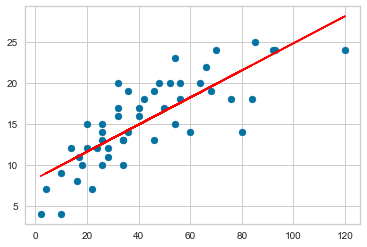

In [22]:
plt.scatter(x, y)
plt.plot(x, modelo.predict(x), color="red")

Observase que uma linha crescente, indica uma correlação positiva e os pontos dos dados estão dispersos de forma próxima a linha, o que indica uma correlação forte.

Sempre irá exisistir uma diferença entre os pontos e a linha, a linha nunca estará exatamente passando por todos os dados, senão o modelo estará com `overfitting`.

Para verificar isso, é feita a análise de resíduos utilizando a classe `ResidualsPlot` da biblioteca `yellowbrick`

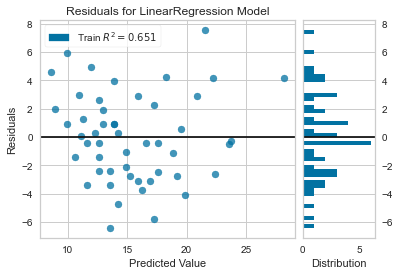

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [26]:
residuos = ResidualsPlot(modelo)
residuos.fit(x, y)
residuos.poof()

Observa-se que os resíduos estão distribuídos de forma aleatória, o que é um bom indício. E na parte da direita do gráfico que eles estão distribuídos com a forma de uma distribuição normal o que é outro indício de uma boa regressão linear.